In [1]:
import glworia.amplification_factor
import glworia.lens_functions
from glworia.amplification_factor import *
from glworia.lens_functions import *
import glworia.lens_functions
from glworia.lens_functions import *
import glworia.contour
from glworia.contour import *
import glworia.utils
from glworia.utils import *
import glworia.root
from glworia.root import *
import glworia.plot
from glworia.plot import *

In [2]:
from importlib import reload

In [3]:
reload(glworia.amplification_factor)
reload(glworia.lens_functions)
from glworia.amplification_factor import *
from glworia.lens_functions import *
reload(glworia.lens_functions)
from glworia.lens_functions import *
reload(glworia.contour)
from glworia.contour import *
reload(glworia.utils)
from glworia.utils import *
reload(glworia.root)
from glworia.root import *
reload(glworia.plot)
from glworia.plot import *

In [4]:
from jax.config import config
config.update("jax_enable_x64", True)

In [5]:
import matplotlib.pyplot as plt

In [6]:
y_low = 0.1
y_high = 5.0
kappa_low = 0.1
kappa_high = 10.0
N_grid = 30
N_grid_strong = 60
N_crit = 60
N = 200
lens_model_name = 'NFW'

T0_max = 1000

In [7]:
jnp.linspace(y_low, y_high, N_grid)

2023-05-21 21:09:46.136135: W external/xla/xla/service/gpu/nvptx_compiler.cc:564] The NVIDIA driver's CUDA version is 12.0 which is older than the ptxas CUDA version (12.1.105). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


Array([0.1       , 0.26896552, 0.43793103, 0.60689655, 0.77586207,
       0.94482759, 1.1137931 , 1.28275862, 1.45172414, 1.62068966,
       1.78965517, 1.95862069, 2.12758621, 2.29655172, 2.46551724,
       2.63448276, 2.80344828, 2.97241379, 3.14137931, 3.31034483,
       3.47931034, 3.64827586, 3.81724138, 3.9862069 , 4.15517241,
       4.32413793, 4.49310345, 4.66206897, 4.83103448, 5.        ],      dtype=float64)

In [8]:
jnp.linspace(kappa_low, kappa_high, N_grid)

Array([ 0.1       ,  0.44137931,  0.78275862,  1.12413793,  1.46551724,
        1.80689655,  2.14827586,  2.48965517,  2.83103448,  3.17241379,
        3.5137931 ,  3.85517241,  4.19655172,  4.53793103,  4.87931034,
        5.22068966,  5.56206897,  5.90344828,  6.24482759,  6.5862069 ,
        6.92758621,  7.26896552,  7.61034483,  7.95172414,  8.29310345,
        8.63448276,  8.97586207,  9.31724138,  9.65862069, 10.        ],      dtype=float64)

In [9]:
y_low_im = 0.1
y_high_im = 5.0
kappa_low_im = 0.1
kappa_high_im = 10.0
N_grid_im = 1000
N_crit_im = 1000

In [10]:
import pickle

interpolate_dir_name = f'y_{y_low:.3f}_{y_high:.3f}_kappa_{kappa_low:.3f}_{kappa_high:.3f}_N_grid_{N_grid}_N_grid_strong_{N_grid_strong}_N_crit_{N_crit}_N_{N}'
image_interp_dir_name = f'{lens_model_name}_y_{y_low_im:.3f}_{y_high_im:.3f}_kappa_{kappa_low_im:.3f}_{kappa_high_im:.3f}_N_{N_grid_im}_N_crit_{N_crit_im}'

In [11]:
with open(f'./interpolation/{interpolate_dir_name}/interp_strong_low.pkl', 'rb') as f:
    interp_strong_low = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_strong_mid_1.pkl', 'rb') as f:
    interp_strong_mid_1 = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_strong_mid_2.pkl', 'rb') as f:
    interp_strong_mid_2 = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_strong_high.pkl', 'rb') as f:
    interp_strong_high = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_strong_sad_max.pkl', 'rb') as f:
    interp_strong_sad_max = pickle.load(f)

In [12]:
with open(f'./interpolation/{image_interp_dir_name}/strong_full_sad_T_adj.pkl', 'rb') as f:
    interp_strong_full_sad_T_adj = pickle.load(f)

with open(f'./interpolation/{image_interp_dir_name}/strong_full_max_T_adj.pkl', 'rb') as f:
    interp_strong_full_max_T_adj = pickle.load(f)  

In [13]:
with open(f'./interpolation/{image_interp_dir_name}/strong_full_sad_mu.pkl', 'rb') as f:
    interp_strong_full_sad_mu = pickle.load(f)

with open(f'./interpolation/{image_interp_dir_name}/strong_full_max_mu.pkl', 'rb') as f:
    interp_strong_full_max_mu = pickle.load(f)

with open(f'./interpolation/{image_interp_dir_name}/strong_full_min_mu.pkl', 'rb') as f:
    interp_strong_full_min_mu = pickle.load(f)

In [14]:
with open(f'./interpolation/{interpolate_dir_name}/interp_weak_low.pkl', 'rb') as f:
    interp_weak_low = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_weak_mid_1.pkl', 'rb') as f:
    interp_weak_mid_1 = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_weak_mid_2.pkl', 'rb') as f:
    interp_weak_mid_2 = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_weak_high.pkl', 'rb') as f:
    interp_weak_high = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_T_vir.pkl', 'rb') as f:
    interp_T_vir = pickle.load(f)

with open(f'./interpolation/{interpolate_dir_name}/interp_mu_min_weak.pkl', 'rb') as f:
    interp_weak_full_min_mu = pickle.load(f)

In [15]:
def chev_points_np(a, b, n):
    chev = -np.cos(np.pi*(np.arange(n)+0.5)/n)
    chev_inner_width = chev[-1]-chev[0]
    return (a+b)/2 + (b-a)/chev_inner_width * chev

def chev_first_half_np(a, b, n):
    chev = -np.cos(np.pi*(np.arange(n)+0.5)/n)
    chev_inner_width = chev[-1]-chev[0]
    reg = np.linspace(-1, 1, n)
    chev_half = np.where(reg < 0, 2*chev/chev_inner_width, reg)
    return (a+b)/2 + (b-a)/2 * chev_half

def make_T0_arr_multiple_chev_np(N, T_images, T0_max):
    T_im_sad = T_images[0]
    T_im_max = T_images[1]
    dt_around_image = T_im_sad / N**3
    T0_arr_low = chev_points_np(dt_around_image,
                              T_im_sad - dt_around_image,
                              N)
    T0_arr_mid_1 = chev_first_half_np(T_im_sad + dt_around_image,
                              2*T_im_sad,
                              N)
    T0_arr_mid_2 = np.linspace(2*T_im_sad + dt_around_image,
                              10*T_im_sad,
                              N)
    T0_arr_high = np.logspace(np.log10(10*T_im_sad + dt_around_image),
                               np.log10(T0_max),
                               N)
    T0_arr_sad_max = chev_points_np(T_im_sad + dt_around_image,
                                  T_im_max - dt_around_image,
                                  N)
    return np.array([T0_arr_low, T0_arr_mid_1,
                            T0_arr_mid_2, T0_arr_high]), T0_arr_sad_max

def make_T0_arr_multiple_np(N, T_images, T0_max):
    T_im_sad = T_images[0]
    T_im_max = T_images[1]
    dt_around_image = T_im_sad / N**3
    T0_arr_low = np.linspace(dt_around_image,
                              T_im_sad - dt_around_image,
                              N)
    T0_arr_mid_1 = np.linspace(T_im_sad + dt_around_image,
                              2*T_im_sad,
                              N)
    T0_arr_mid_2 = np.linspace(2*T_im_sad + dt_around_image,
                              10*T_im_sad,
                              N)
    T0_arr_high = np.logspace(np.log10(10*T_im_sad + dt_around_image),
                               np.log10(T0_max),
                               N)
    T0_arr_sad_max = np.linspace(T_im_sad + dt_around_image,
                                  T_im_max - dt_around_image,
                                  N)
    return np.array([T0_arr_low, T0_arr_mid_1,
                            T0_arr_mid_2, T0_arr_high]), T0_arr_sad_max

In [281]:
y_interp = 0.8
kappa_interp = 6.0

In [282]:
T_sad = interp_strong_full_sad_T_adj(y_interp, kappa_interp)
strongly_lensed = ~np.isnan(T_sad)

In [283]:
if strongly_lensed:
    u_interp_low = interp_strong_low(y_interp, kappa_interp).ravel()
    u_interp_mid_1 = interp_strong_mid_1(y_interp, kappa_interp).ravel()
    u_interp_mid_2 = interp_strong_mid_2(y_interp, kappa_interp).ravel()
    u_interp_high = interp_strong_high(y_interp, kappa_interp).ravel()
    u_interp_sad_max = interp_strong_sad_max(y_interp, kappa_interp).ravel()
    T_sad_interp = interp_strong_full_sad_T_adj(y_interp, kappa_interp)
    T_max_interp = interp_strong_full_max_T_adj(y_interp, kappa_interp)
    mu_sad_interp = interp_strong_full_sad_mu(y_interp, kappa_interp)
    mu_max_interp = interp_strong_full_max_mu(y_interp, kappa_interp)
    mu_min_interp = interp_strong_full_min_mu(y_interp, kappa_interp)
else:
    u_interp_low = interp_weak_low(y_interp, kappa_interp).ravel()
    u_interp_mid_1 = interp_weak_mid_1(y_interp, kappa_interp).ravel()
    u_interp_mid_2 = interp_weak_mid_2(y_interp, kappa_interp).ravel()
    u_interp_high = interp_weak_high(y_interp, kappa_interp).ravel()
    T_sad_interp = interp_T_vir(y_interp, kappa_interp)
    T_max_interp = np.nan
    mu_sad_interp = np.nan
    mu_max_interp = np.nan
    mu_min_interp = interp_weak_full_min_mu(y_interp, kappa_interp)

In [284]:
print(mu_sad_interp, mu_max_interp, mu_min_interp)

1.4995887102500216 0.07163050297975032 2.799383519573506


In [285]:
T0_min_out_interp_seg, T0_sad_max_interp = make_T0_arr_multiple_chev_np(N, np.array([T_sad_interp, T_max_interp, 0]),
                                             T0_max = T0_max)

In [286]:
T0_min_out_interp_full = np.concatenate(T0_min_out_interp_seg)
u_min_out_interp_full = np.concatenate([u_interp_low, u_interp_mid_1, u_interp_mid_2, u_interp_high])

In [287]:
def sad_log(t, mu_sad, T_sad):
    return -jnp.sqrt(jnp.abs(mu_sad))*jnp.log(jnp.abs(T_sad - t))/jnp.pi

(2.8857528161545463, 2.9440508528445375)

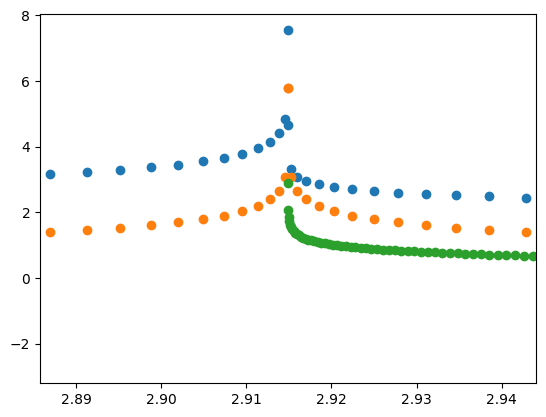

In [288]:
log_sad = sad_log(T0_min_out_interp_full, mu_sad_interp, T_sad_interp)

plt.scatter(T0_min_out_interp_full, u_min_out_interp_full)
plt.scatter(T0_min_out_interp_full, log_sad)
if strongly_lensed:
    plt.scatter(T0_sad_max_interp, u_interp_sad_max)
plt.xlim(T_sad_interp*0.99, T_sad_interp*1.01)
# plt.xscale('log')

In [289]:
def interp_F_fft(t_fft):
    F_fft = np.interp(t_fft, T0_min_out_interp_full, u_min_out_interp_full)
    if strongly_lensed:
        F_fft += np.interp(t_fft, T0_sad_max_interp, u_interp_sad_max, left = 0., right = 0.)
    return F_fft

In [290]:
T_im_hi = np.nanmax((T_max_interp, T_sad_interp))
t_fft_short_max = T_im_hi*20
t_fft_long_max = np.min((T_im_hi*2000, 1000))
t_fft_short = np.linspace(0, t_fft_short_max, 2**16)
t_fft_long = np.linspace(0, t_fft_long_max, 2**16)
F_fft_short = interp_F_fft(t_fft_short)
F_fft_long = interp_F_fft(t_fft_long)

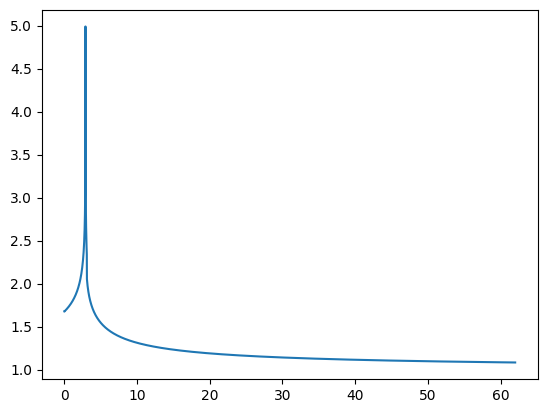

In [291]:
plt.plot(t_fft_short, F_fft_short)

In [292]:
def amplification_fft_np(t_fft, Ft_fft):

    fft_len = len(t_fft)
    dt = t_fft[1] - t_fft[0]
    w_arr = np.linspace(0, 2*np.pi/dt, num = fft_len)
    Fw_raw = w_arr*np.fft.fft(Ft_fft)*dt
    Fw = -np.imag(Fw_raw) - 1.j*np.real(Fw_raw) + Ft_fft[-1]

    return w_arr, Fw

In [293]:
def F_geom(ws, T_im, mu_im):
    F = np.zeros(len(ws), dtype = np.complex128)
    morse_indx = [0.5, 1, 0]
    mu_im = np.nan_to_num(mu_im)
    for i in range(3):
        F += np.sqrt(np.abs(mu_im[i]))*np.exp(1.j*(ws*T_im[i] - np.pi*morse_indx[i]))
    return F

In [294]:
w_arr_high, Fw_high = amplification_fft_np(t_fft_short, F_fft_short)

In [295]:
w_arr_low, Fw_low = amplification_fft_np(t_fft_long, F_fft_long)

In [296]:
if strongly_lensed:
    mu_im = [mu_sad_interp, mu_max_interp, mu_min_interp]
    T_im = [T_sad_interp, T_max_interp, 0]
else:
    mu_im = [0, 0, mu_min_interp]
    T_im = [0, 0, 0]
F_g = F_geom(w_arr_high, T_im, mu_im)
# else:
#     F_geom = np.ones_like(w_arr_high)*np.sqrt(np.abs(mu_min_interp))

In [297]:
from bisect import bisect_left
indx = bisect_left(w_arr_low, 25/T_im_hi)
y_lim_high = np.max(np.abs(Fw_low[:indx]))*1.5
y_lim_low = np.min(np.abs(Fw_low[:indx]))*0.8

In [298]:
w_trans_1 = 2.5/T_im_hi
w_trans_2 = 250/T_im_hi if strongly_lensed else 1000/T_im_hi

(0.18754730090424235, 4.756028906699802)

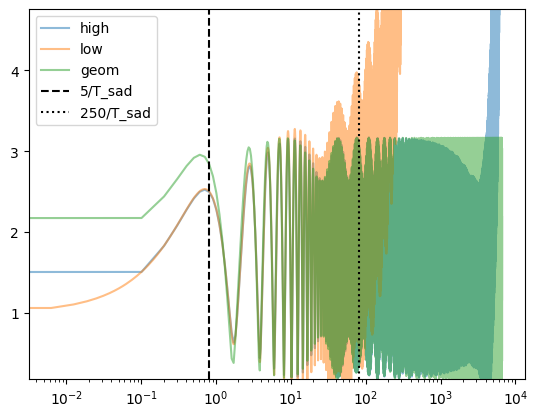

In [299]:
plt.semilogx(w_arr_high, np.abs(Fw_high), label = 'high', alpha = 0.5)
plt.semilogx(w_arr_low, np.abs(Fw_low), label = 'low', alpha = 0.5)
plt.semilogx(w_arr_high, np.abs(F_g), label = 'geom', alpha = 0.5)
plt.axvline(w_trans_1, color = 'k', linestyle = '--', label = '5/T_sad')
plt.axvline(w_trans_2, color = 'k', linestyle = ':', label = '250/T_sad')
plt.legend()
plt.ylim(y_lim_low, y_lim_high)

In [300]:
def smooth_increase(x, x0, a):
    return (1 + np.tanh((x - x0)/a))/2

def smooth_decrease(x, x0, a):
    return 1 - smooth_increase(x, x0, a)

In [301]:
def interp_partitions(w_interp, ws, Fs, partitions, sigs, T_im, mu_im):
    F_interp = np.zeros_like(w_interp, dtype = np.complex128)
    F_interp_raw = [np.ones_like(w_interp, dtype=np.complex128)]
    for i, (w, F) in enumerate(zip(ws, Fs)):
        F_interp_raw.append(np.interp(w_interp, w, F, left = 1., right = 0.))
    F_interp_raw.append(F_geom(w_interp, T_im, mu_im))
    for i in range(len(partitions)):
        if i == 0:
            F_interp += F_interp_raw[i]*smooth_decrease(w_interp, partitions[i], sigs[i])
        if i < len(partitions) - 1:
            F_interp += F_interp_raw[i+1]*smooth_increase(w_interp, partitions[i], sigs[i])\
                        *smooth_decrease(w_interp, partitions[i+1], sigs[i+1])
        else:
            F_interp += F_interp_raw[i+1]*smooth_increase(w_interp, partitions[i], sigs[i])
    return F_interp

In [302]:
w_interp = np.linspace(0.001, 1e4, num = 10**6)
w_list = [w_arr_low, w_arr_high]
F_list = [Fw_low, Fw_high]
w_low_trans = w_arr_low[0]
partitions = np.array([w_low_trans, w_trans_1, w_trans_2])
sigs = partitions/10

F_interp = interp_partitions(w_interp, w_list, F_list, partitions, sigs, T_im, mu_im)

/tmp/ipykernel_14998/2650318756.py:2: RuntimeWarning: divide by zero encountered in divide
  return (1 + np.tanh((x - x0)/a))/2


(0.18754730090424235, 9.512057813399604)

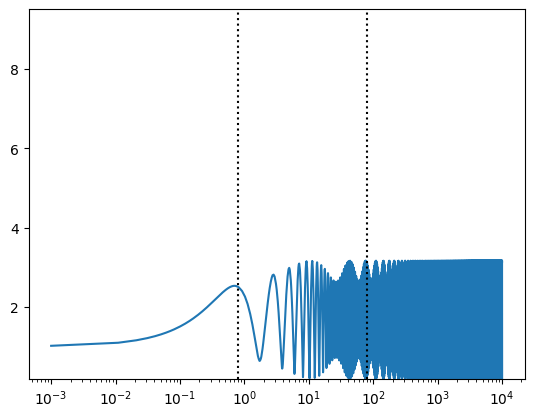

In [308]:
plt.semilogx(w_interp, np.abs(F_interp))
plt.axvline(w_trans_1, color = 'k', linestyle = ':', label = '5/T_sad')
plt.axvline(w_trans_2, color = 'k', linestyle = ':', label = '250/T_sad')
plt.ylim(y_lim_low, y_lim_high*2)